In [1]:
import pandas as pd
from tqdm.notebook import tqdm 
import gc
import numpy as np

In [2]:
import statistics as stat
def calculate_mode(x):
    try:
        moda=stat.mode(x)
    except:
        moda=np.nan
    return moda

In [3]:
path = '../data'
y_train = pd.read_csv(f'{path}/y_train.csv', index_col = 'key_value')

## Procesar RCC

In [4]:
rcc_train = pd.read_csv(f'{path}/rcc_train.csv')
rcc_test = pd.read_csv(f'{path}/rcc_test.csv')

In [5]:
rcc_test['cod_instit_financiera'].fillna(rcc_test['cod_instit_financiera'].value_counts().index[0], inplace=True)
rcc_test['PRODUCTO'].fillna(rcc_test['PRODUCTO'].value_counts().index[0], inplace=True)

In [6]:
dict_ = {'codmes': 'int32',
 'key_value': 'int32',
 'condicion': 'int32',
 'tipo_credito': 'int32',
 'cod_instit_financiera': 'int32',
 'PRODUCTO': 'int32',
 'RIESGO_DIRECTO': 'int32',
 'COD_CLASIFICACION_DEUDOR': 'int32'}
rcc_train = rcc_train.astype(dict_)
rcc_test = rcc_test.astype(dict_)

In [7]:
bins = [-1, 0, 10, 20, 30, 60, 90, 180, 360, 720, float("inf")]
rcc_train["condicion"] = pd.cut(rcc_train.condicion, bins)
rcc_train["condicion"] = rcc_train["condicion"].cat.codes
rcc_test["condicion"] = pd.cut(rcc_test.condicion, bins)
rcc_test["condicion"] = rcc_test["condicion"].cat.codes

In [11]:
rcc_train.isna().sum()

codmes                      0
key_value                   0
condicion                   0
tipo_credito                0
cod_instit_financiera       0
saldo                       0
PRODUCTO                    0
RIESGO_DIRECTO              0
COD_CLASIFICACION_DEUDOR    0
dtype: int64

In [14]:
moda=lambda x: calculate_mode(x)
moda.__name__='mode'
agg_rcc = {'condicion':['max','min','mean','std','sum'],
           'saldo':['max','min','mean','std','sum'],
           'cod_instit_financiera':['nunique','min','max',moda],
           'PRODUCTO':['nunique','min','max',moda],
           'COD_CLASIFICACION_DEUDOR':['nunique','max','min','sum','mean','std',moda],
           'RIESGO_DIRECTO':['nunique','max','min','sum','mean','std',moda],
           'tipo_credito':['nunique','max','min','sum','mean','std',moda]
          }

In [15]:
list_rcc_train_agg = []
for n,i in enumerate(sorted(set(rcc_train.codmes),reverse=True)):
    if n in [0,1,2,3,4,5,11]:
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR','condicion']:
            print(f'haciendo {c}')
            rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby(['key_value', c]).saldo.sum().unstack(level = 1, fill_value=-0.07289224159199438)
            rcc_train_agg.columns = [f'{rcc_train_agg.columns.name}_{c}_saldo_ult{n+1}meses' for c in rcc_train_agg.columns]
            list_rcc_train_agg.append(rcc_train_agg)
            gc.collect()
            
        print(f'haciendo aggregate de {i}')
        rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby('key_value').agg(agg_rcc)
        rcc_train_agg.columns = [i+'_'+j+f'_ult{n+1}mes' for i,j in rcc_train_agg.columns]
        list_rcc_train_agg.append(rcc_train_agg)
        gc.collect()

rcc_train_ = pd.concat(list_rcc_train_agg, axis=1)
del rcc_train, list_rcc_train_agg

haciendo tipo_credito


Exception ignored in: <function tqdm.__del__ at 0x000001E1FF24CD30>
Traceback (most recent call last):
  File "C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\tqdm\std.py", line 1134, in __del__
    self.close()
  File "C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201802
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201801
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201712
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201711
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201710
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201709
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201703


In [19]:
list_rcc_test_agg = []
for n,i in enumerate(sorted(set(rcc_test.codmes),reverse=True)):
    if n in [0,1,2,3,4,5,11]:
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR','condicion']:
            print(f'haciendo {c}')
            rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby(['key_value', c]).saldo.sum().unstack(level = 1, fill_value=-0.07289224159199438)
            rcc_test_agg.columns = [f'{rcc_test_agg.columns.name}_{c}_saldo_ult{n+1}meses' for c in rcc_test_agg.columns]
            list_rcc_test_agg.append(rcc_test_agg)
            gc.collect()
        print(f'haciendo aggregate de {i}')
        rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby('key_value').agg(agg_rcc)
        rcc_test_agg.columns = [i+'_'+j+f'_ult{n+1}mes' for i,j in rcc_test_agg.columns]
        list_rcc_test_agg.append(rcc_test_agg)
        gc.collect()

rcc_test_ = pd.concat(list_rcc_test_agg, axis=1)
del rcc_test, list_rcc_test_agg

haciendo tipo_credito


Exception ignored in: <function tqdm.__del__ at 0x000001E1FF24CD30>
Traceback (most recent call last):
  File "C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\tqdm\std.py", line 1134, in __del__
    self.close()
  File "C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000001E1FF24CD30>
Traceback (most recent call last):
  File "C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\tqdm\std.py", line 1134, in __del__
    self.close()
  File "C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\tqdm\notebook.py", line 280, in close
    self.disp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201902
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201901
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201812
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201811
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201810
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201809
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo condicion
haciendo aggregate de 201803


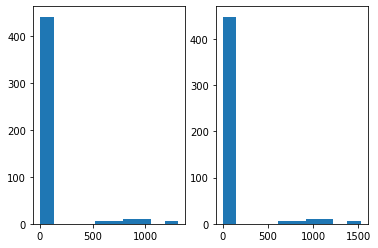

In [36]:
plt.subplot(121).hist(rcc_train_.isna().sum());
plt.subplot(122).hist(rcc_test_.isna().sum());

In [37]:
### asegurar que las columnas esten en ambas bases (train/test)
print(rcc_train_.shape, rcc_test_.shape)
keep_columns = list(set(rcc_train_.columns).intersection(rcc_test_.columns))
rcc_train_ = rcc_train_[keep_columns].copy()
rcc_test_ = rcc_test_[keep_columns].copy()
print(rcc_train_.shape, rcc_test_.shape)

(358487, 476) (396666, 483)
(358487, 476) (396666, 476)


In [39]:
### imputar datos categoricos
var_categ = [i for i in rcc_train_.columns if 'mode' in i]
for i in var_categ:
    rcc_train_[i] = rcc_train_[i].fillna(rcc_train_[i].value_counts().index[0])
    rcc_test_[i] = rcc_test_[i].fillna(rcc_train_[i].value_counts().index[0])

In [40]:
### mean encoding
rcc_train_ = pd.concat([rcc_train_, y_train], axis=1)
for i in var_categ:
    me = rcc_train_.groupby([i])['target'].mean().to_dict() 
    rcc_train_[f'{i}_me'] =  rcc_train_[i].map(me) 
    rcc_test_[f'{i}_me'] =  rcc_test_[i].map(me)
    ### imputar datos faltantes
    rcc_test_[f'{i}_me'] =  rcc_test_[f'{i}_me'].fillna(rcc_train_[f'{i}_me'].median())
    
    
rcc_train_.drop('target', axis=1, inplace=True)
rcc_train_.drop(var_categ, axis=1, inplace=True)
rcc_test_.drop(var_categ, axis=1, inplace=True)

#### guardando archivo procesado de RCC

In [46]:
# guardando archivo procesado de rcc
rcc_train_.to_csv('../data/intermediate/rcc_train.csv')
rcc_test_.to_csv('../data/intermediate/rcc_test.csv')
# ### cargando archivo procesado de rcc
# rcc_train_ = pd.read_csv('../data/intermediate/rcc_train_v2.csv', index_col='key_value')
# rcc_test_ = pd.read_csv('../data/intermediate/rcc_test_v2.csv',index_col='key_value')

In [41]:
### unir RCC en la base final
train = rcc_train_.copy()
test = rcc_test_.copy()
del rcc_train_, rcc_test_

## Procesar SE

In [57]:
se_train = pd.read_csv(f'{path}/se_train.csv', index_col = 'key_value')
se_test = pd.read_csv(f'{path}/se_test.csv', index_col = 'key_value')

In [58]:
dict_ = {'sexo':'int32',
         'est_cvl':'int32',
         'sit_lab':'int32',
         'cod_ocu':'int32',
         'ctd_hijos':'int32',
         'flg_sin_email':'int32',
         'ctd_veh':'int32',
         'lgr_vot':'int32',
         'prv':'int32',
         'dto':'int32',
         'rgn':'int32',
         'tip_lvledu':'int32'}
se_train = se_train.astype(dict_)
se_test = se_test.astype(dict_)

In [59]:
### imputar datos faltantes en la base se_[train/test]
se_train['edad'].fillna(se_train['edad'].median(), inplace=True)
se_test['edad'].fillna(se_train['edad'].median(), inplace=True)
se_train['cod_ubi'].fillna(se_train['cod_ubi'].median(), inplace=True)
se_test['cod_ubi'].fillna(se_train['cod_ubi'].median(), inplace=True)

In [60]:
### mean encoding
var_categ=['sit_lab','lgr_vot','sexo','rgn','tip_lvledu','flg_sin_email','prv','est_cvl','cod_ocu','dto']
# var_caunti=['edad','ctd_hijos','ctd_veh','cod_ubi']
se_train['target'] = y_train.loc[se_train.index]
for i in var_categ:
    me = se_train.groupby([i])['target'].mean().to_dict() 
    se_train[f'{i}_me'] =  se_train[i].map(me) 
    se_test[f'{i}_me'] =  se_test[i].map(me)
    ### imputar datos faltantes
    se_test[f'{i}_me'] =  se_test[f'{i}_me'].fillna(se_train[f'{i}_me'].median())
se_train.drop('target', axis=1, inplace=True)
se_train.drop(var_categ, axis=1, inplace=True)
se_test.drop(var_categ, axis=1, inplace=True)

#### guardando archivo procesado de SE

In [61]:
## guardando archivo procesado de se
se_train.to_csv('../data/intermediate/se_train.csv')
se_test.to_csv('../data/intermediate/se_test.csv')
## cargando archivo procesado de se
se_train = pd.read_csv('../data/intermediate/se_train.csv', index_col='key_value')
se_test = pd.read_csv('../data/intermediate/se_test.csv',index_col='key_value')

In [62]:
### unir SE en la base final
train = train.join(se_train) 
test = test.join(se_test)
del se_train, se_test

In [49]:
## imputar valores faltantes
var_caunti = ['lgr_vot_me','sit_lab_me','cod_ubi','tip_lvledu_me','prv_me','rgn_me',
 'ctd_hijos','edad','cod_ocu_me','ctd_veh','est_cvl_me','dto_me','flg_sin_email_me','sexo_me']
for i in var_caunti:
    train[i] = train[i].fillna(train[i].median())
    test[i] = test[i].fillna(train[i].median())

## Procesar SUNAT

In [50]:
sunat_train = pd.read_csv(f'{path}/sunat_train.csv')
sunat_test = pd.read_csv(f'{path}/sunat_test.csv')

In [51]:
### eliminar registros duplicados
sunat_train.drop_duplicates(inplace=True)
sunat_test.drop_duplicates(inplace=True)
sunat_train.shape, sunat_test.shape

((292479, 18), (318821, 18))

In [52]:
#### eliminando registros con fecalta y fecbaja con valores nulos
mask = ~((sunat_train['fecalta'].astype('str')=='nan') & (sunat_train['fecbaja'].astype('str')=='nan'))
sunat_train = sunat_train[mask].copy()
mask = ~((sunat_test['fecalta'].astype('str')=='nan') & (sunat_test['fecbaja'].astype('str')=='nan'))
sunat_test = sunat_test[mask].copy()
sunat_train.shape, sunat_test.shape

((272028, 18), (293080, 18))

In [53]:
dict_ = {'tipcontribuyente': 'int32',
         'tippersona': 'int32',
         'ciiu': 'int32',
         'ubigeo': 'int32',
         'condiciondomicilio': 'int32',
         'estadocontribuyente': 'int32',
         'codvia': 'int32',
         'codzona': 'int32',
         'contabilidad': 'int32',
         'facturacion': 'int32',
         'domiciliado': 'int32',
         'comercioexterior': 'int32',
         'cargorele': 'int32',
         'codentidadtributo': 'int32',
         'estadotributo': 'int32'}
sunat_train = sunat_train.astype(dict_)
sunat_test = sunat_test.astype(dict_)

In [54]:
sunat_train['diff_fech'] = sunat_train['fecbaja'] - sunat_train['fecalta']
sunat_test['diff_fech'] = sunat_test['fecbaja'] - sunat_test['fecalta']

In [55]:
moda=lambda x: calculate_mode(x)
moda.__name__='mode'
agg_sunat = {'tipcontribuyente':['nunique',moda],
           'tippersona':['nunique',moda],
           'ciiu':['nunique', moda],
           'ubigeo':['nunique',moda],
           'condiciondomicilio':['nunique',moda],
           'estadocontribuyente':['nunique',moda],
           'codvia':['nunique',moda],
           'codzona':['nunique',moda],
           'contabilidad':['nunique',moda],
           'facturacion':['nunique',moda],
           'domiciliado':['nunique',moda],
           'comercioexterior':['nunique',moda],
           'cargorele':['nunique',moda],
           'codentidadtributo':['nunique',moda],
           'estadotributo':['nunique',moda],
           'fecalta':['mean','max', 'nunique'],
           'fecbaja':['mean','max', 'nunique'], 
           'diff_fech':['mean','max', 'nunique'], 
            }

sunat_train_ = sunat_train.groupby('key_value').agg(agg_sunat)
sunat_train_.columns = [i+'_'+j for i,j in sunat_train_.columns]
sunat_test_ = sunat_test.groupby('key_value').agg(agg_sunat)
sunat_test_.columns = [i+'_'+j for i,j in sunat_test_.columns]
del sunat_train, sunat_test

#### guardando archivo procesado de SUNAT

In [56]:
### guardando archivo procesado de sunat
sunat_train_.to_csv('../data/intermediate/sunat_train.csv')
sunat_test_.to_csv('../data/intermediate/sunat_test.csv')
### cargando archivo procesado de sunat
sunat_train_ = pd.read_csv('../data/intermediate/sunat_train.csv', index_col='key_value')
sunat_test_ = pd.read_csv('../data/intermediate/sunat_test.csv',index_col='key_value')

In [63]:
### unir SUNAT en la base final
train = train.join(sunat_train_)
test = test.join(sunat_test_)
del sunat_train_, sunat_test_

In [64]:
test.isna().sum().sort_values().tail(40)/len(test)

tipo_credito_std_ult1mes       0.003855
facturacion_mode               0.422910
domiciliado_nunique            0.422910
domiciliado_mode               0.422910
comercioexterior_nunique       0.422910
comercioexterior_mode          0.422910
cargorele_nunique              0.422910
cargorele_mode                 0.422910
fecalta_max                    0.422910
codentidadtributo_mode         0.422910
estadotributo_nunique          0.422910
estadotributo_mode             0.422910
fecalta_mean                   0.422910
facturacion_nunique            0.422910
fecalta_nunique                0.422910
fecbaja_nunique                0.422910
codentidadtributo_nunique      0.422910
contabilidad_mode              0.422910
codvia_nunique                 0.422910
codzona_mode                   0.422910
tipcontribuyente_nunique       0.422910
tipcontribuyente_mode          0.422910
tippersona_nunique             0.422910
tippersona_mode                0.422910
contabilidad_nunique           0.422910


## Training

In [66]:
train.shape, test.shape

((358487, 529), (396666, 529))

In [69]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
folds = [train.index[t] for t, v in KFold(5).split(train)]
test_probs = []
train_probs = []
fi = []
for i, idx in enumerate(folds):
    print("*"*10, i, "*"*10)
    Xt = train.loc[idx]
    yt = y_train.loc[Xt.index]

    Xv = train.drop(Xt.index)
    yv = y_train.loc[Xv.index]

    learner = CatBoostClassifier(n_estimators=1000,  eval_metric = 'AUC', max_depth = 6)
    learner.fit(Xt, yt,  early_stopping_rounds=10, 
                eval_set=[(Xt, yt), (Xv, yv)], verbose=50)
    test_probs.append(pd.Series(learner.predict_proba(test)[:, -1], index=test.index, name="fold_" + str(i)))
    train_probs.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="probs"))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))
    gc.collect()
test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
train_probs = pd.concat(train_probs)
fi = pd.concat(fi, axis=1).mean(axis=1)
print("*" * 21)
print("roc auc estimado: ", roc_auc_score(y_train, train_probs.loc[y_train.index]))
print("roc auc varianza: ", np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]))

********** 0 **********
Learning rate set to 0.128212
0:	test: 0.7596428	test1: 0.7595157	best: 0.7595157 (0)	total: 390ms	remaining: 6m 29s
50:	test: 0.8314743	test1: 0.8299549	best: 0.8299549 (50)	total: 13.4s	remaining: 4m 10s
100:	test: 0.8403751	test1: 0.8372475	best: 0.8372475 (100)	total: 27.8s	remaining: 4m 7s
150:	test: 0.8472075	test1: 0.8421988	best: 0.8421988 (150)	total: 40.4s	remaining: 3m 47s
200:	test: 0.8518218	test1: 0.8447107	best: 0.8447107 (200)	total: 53.6s	remaining: 3m 32s
250:	test: 0.8554655	test1: 0.8462349	best: 0.8462349 (250)	total: 1m 7s	remaining: 3m 21s
300:	test: 0.8585992	test1: 0.8471408	best: 0.8471623 (296)	total: 1m 19s	remaining: 3m 4s
350:	test: 0.8616006	test1: 0.8477409	best: 0.8477409 (350)	total: 1m 32s	remaining: 2m 51s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.8478725916
bestIteration = 359

Shrink model to first 360 iterations.
********** 1 **********
Learning rate set to 0.128212
0:	test: 0.7570365	test1: 0.7557

In [70]:
fi.to_pickle('fi_catboost.pkl')
fi = pd.read_pickle('fi_catboost.pkl')
features_importances_350 = list(fi.sort_values(ascending=False).head(350).index)
len(features_importances_350)

350

In [71]:
fi.sort_values(ascending=False).head(50)

dto_me                                        0.052041
cod_instit_financiera_mode_ult1mes_me         0.030246
tipo_credito_sum_ult12mes                     0.029668
COD_CLASIFICACION_DEUDOR_mean_ult1mes         0.026830
tip_lvledu_me                                 0.023739
RIESGO_DIRECTO_1_saldo_ult1meses              0.019971
tipo_credito_11_saldo_ult1meses               0.019324
edad                                          0.017581
RIESGO_DIRECTO_sum_ult12mes                   0.017406
COD_CLASIFICACION_DEUDOR_max_ult1mes          0.016810
COD_CLASIFICACION_DEUDOR_sum_ult1mes          0.015080
sexo_me                                       0.013601
saldo_sum_ult1mes                             0.013471
PRODUCTO_min_ult1mes                          0.012943
RIESGO_DIRECTO_mean_ult1mes                   0.012649
flg_sin_email_me                              0.012361
cod_instit_financiera_nunique_ult1mes         0.012164
RIESGO_DIRECTO_-1_saldo_ult1meses             0.011622
cod_instit

In [73]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
folds = [train.index[t] for t, v in KFold(5).split(train)]
test_probs = []
train_probs = []
fi = []
for i, idx in enumerate(folds):
    print("*"*10, i, "*"*10)
    Xt = train.loc[idx]
    yt = y_train.loc[Xt.index]

    Xv = train.drop(Xt.index)
    yv = y_train.loc[Xv.index]

    learner = LGBMClassifier(n_estimators=1000, max_depth = 6, boosting_type='gbdt', min_child_samples=1000)
    learner.fit(Xt, yt,  early_stopping_rounds=10, eval_metric="auc",
                eval_set=[(Xt, yt), (Xv, yv)], verbose=50)
    test_probs.append(pd.Series(learner.predict_proba(test)[:, -1], index=test.index, name="fold_" + str(i)))
    train_probs.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="probs"))
    fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))

test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
train_probs = pd.concat(train_probs)
fi = pd.concat(fi, axis=1).mean(axis=1)
print("*" * 21)
print("roc auc estimado: ", roc_auc_score(y_train, train_probs.loc[y_train.index]))
print("roc auc varianza: ", np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]))  

********** 0 **********


C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.842068	training's binary_logloss: 0.30435	valid_1's auc: 0.835082	valid_1's binary_logloss: 0.309371
[100]	training's auc: 0.853688	training's binary_logloss: 0.295025	valid_1's auc: 0.843605	valid_1's binary_logloss: 0.302973
[150]	training's auc: 0.860432	training's binary_logloss: 0.289738	valid_1's auc: 0.846865	valid_1's binary_logloss: 0.300426
[200]	training's auc: 0.865919	training's binary_logloss: 0.285502	valid_1's auc: 0.848669	valid_1's binary_logloss: 0.299006
[250]	training's auc: 0.869869	training's binary_logloss: 0.282306	valid_1's auc: 0.849899	valid_1's binary_logloss: 0.298014
[300]	training's auc: 0.873093	training's binary_logloss: 0.279555	valid_1's auc: 0.85055	valid_1's binary_logloss: 0.29746
Early stopping, best iteration is:
[332]	training's auc: 

In [74]:
fi.to_pickle('fi_lightgbm.pkl')
fi = pd.read_pickle('fi_lightgbm.pkl')
features_importances_350 = list(fi.sort_values(ascending=False).head(350).index)
len(features_importances_350)

350

In [75]:
fi.sort_values(ascending=False).head(50)

dto_me                                    0.024878
tipo_credito_sum_ult12mes                 0.020595
edad                                      0.017899
RIESGO_DIRECTO_1_saldo_ult1meses          0.015063
cod_ubi                                   0.014775
cod_instit_financiera_mode_ult1mes_me     0.014701
tipo_credito_11_saldo_ult1meses           0.013200
tipo_credito_sum_ult1mes                  0.012868
RIESGO_DIRECTO_sum_ult12mes               0.012771
RIESGO_DIRECTO_1_saldo_ult12meses         0.012482
RIESGO_DIRECTO_mean_ult1mes               0.012077
saldo_mean_ult12mes                       0.012016
RIESGO_DIRECTO_-1_saldo_ult1meses         0.011753
ubigeo_mode                               0.011692
cod_instit_financiera_max_ult1mes         0.011375
tip_lvledu_me                             0.010254
cod_instit_financiera_mode_ult12mes_me    0.010062
saldo_min_ult1mes                         0.009493
cod_instit_financiera_min_ult1mes         0.009483
tipo_credito_sum_ult2mes       

In [76]:
from catboost import CatBoostClassifier
fi = pd.read_pickle('fi_catboost.pkl')
features_importances_250_catboost = list(fi.sort_values(ascending=False).head(250).index)
learner_catboost = CatBoostClassifier(n_estimators=1000, eval_metric = 'AUC', max_depth = 6)
learner_catboost.fit(train[features_importances_250_catboost], y_train,  early_stopping_rounds=10, verbose=False)

In [77]:
from lightgbm import LGBMClassifier
fi = pd.read_pickle('fi_lightgbm.pkl')
features_importances_250_lightgbm = list(fi.sort_values(ascending=False).head(250).index)
learner_lightgbm = LGBMClassifier(n_estimators=1000, max_depth=6, boosting_type='gbdt', min_child_samples=1000)
learner_lightgbm.fit(train[features_importances_250_lightgbm], y_train, eval_metric="auc", verbose=True)

C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\usuario\anaconda3\envs\venv_datathon\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=1000, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [78]:
test_probs_catboost = pd.Series(learner_catboost.predict_proba(test[features_importances_250_catboost])[:, -1], index=test.index, name="target")
test_probs_lightgbm = pd.Series(learner_lightgbm.predict_proba(test[features_importances_250_lightgbm])[:, -1], index=test.index, name="target")
test_probs_mean = test_probs_catboost*0.4 + test_probs_lightgbm*0.6
test_probs_mean.name = 'target'
test_probs_mean.shape

(396666,)

In [79]:
test_probs_mean.to_csv("../results/test80.csv")

In [80]:
!kaggle competitions submit -c interbank20 -f ../results/test80.csv -m "test 80"

Successfully submitted to Datathon Internacional Interbank 2020


  0%|          | 0.00/10.5M [00:00<?, ?B/s]
  0%|          | 8.00k/10.5M [00:02<52:38, 3.48kB/s]
  2%|1         | 208k/10.5M [00:03<02:11, 82.1kB/s] 
  2%|2         | 224k/10.5M [00:03<02:05, 85.5kB/s]
  2%|2         | 264k/10.5M [00:03<01:44, 103kB/s] 
  3%|2         | 312k/10.5M [00:03<01:21, 130kB/s]
  3%|3         | 368k/10.5M [00:03<01:03, 168kB/s]
  4%|4         | 432k/10.5M [00:04<00:49, 212kB/s]
  5%|4         | 496k/10.5M [00:04<00:41, 253kB/s]
  5%|5         | 568k/10.5M [00:04<00:34, 304kB/s]
  7%|6         | 704k/10.5M [00:04<00:23, 441kB/s]
  7%|7         | 784k/10.5M [00:04<00:21, 468kB/s]
  8%|8         | 872k/10.5M [00:04<00:20, 503kB/s]
  9%|8         | 928k/10.5M [00:04<00:20, 490kB/s]
  9%|9         | 984k/10.5M [00:05<00:20, 487kB/s]
 10%|9         | 1.03M/10.5M [00:05<00:18, 534kB/s]
 10%|#         | 1.09M/10.5M [00:05<00:21, 469kB/s]
 11%|#         | 1.14M/10.5M [00:05<00:21, 446kB/s]
 11%|#1        | 1.19M/10.5M [00:05<00:22, 426kB/s]
 12%|#1        | 1.23M/10.5

In [88]:
display(
train[features_importances_250_catboost].isna().sum().sort_values().tail(36)/len(train),
test[features_importances_250_catboost].isna().sum().sort_values().tail(36)/len(test)
)

PRODUCTO_min_ult4mes                     0.000000
RIESGO_DIRECTO_std_ult12mes              0.001738
saldo_std_ult12mes                       0.001738
condicion_std_ult12mes                   0.001738
COD_CLASIFICACION_DEUDOR_std_ult12mes    0.001738
tipo_credito_std_ult12mes                0.001738
saldo_std_ult6mes                        0.002120
RIESGO_DIRECTO_std_ult6mes               0.002120
RIESGO_DIRECTO_std_ult5mes               0.002212
condicion_std_ult5mes                    0.002212
saldo_std_ult5mes                        0.002212
tipo_credito_std_ult4mes                 0.002357
RIESGO_DIRECTO_std_ult4mes               0.002357
saldo_std_ult4mes                        0.002357
COD_CLASIFICACION_DEUDOR_std_ult3mes     0.002600
RIESGO_DIRECTO_std_ult3mes               0.002600
saldo_std_ult3mes                        0.002600
condicion_std_ult2mes                    0.002876
COD_CLASIFICACION_DEUDOR_std_ult2mes     0.002876
saldo_std_ult2mes                        0.002876


PRODUCTO_min_ult4mes                     0.000000
RIESGO_DIRECTO_std_ult12mes              0.001775
saldo_std_ult12mes                       0.001775
condicion_std_ult12mes                   0.001775
COD_CLASIFICACION_DEUDOR_std_ult12mes    0.001775
tipo_credito_std_ult12mes                0.001775
saldo_std_ult6mes                        0.002271
RIESGO_DIRECTO_std_ult6mes               0.002271
RIESGO_DIRECTO_std_ult5mes               0.002418
condicion_std_ult5mes                    0.002418
saldo_std_ult5mes                        0.002418
tipo_credito_std_ult4mes                 0.002551
RIESGO_DIRECTO_std_ult4mes               0.002551
saldo_std_ult4mes                        0.002551
COD_CLASIFICACION_DEUDOR_std_ult3mes     0.002748
RIESGO_DIRECTO_std_ult3mes               0.002748
saldo_std_ult3mes                        0.002748
condicion_std_ult2mes                    0.003040
COD_CLASIFICACION_DEUDOR_std_ult2mes     0.003040
saldo_std_ult2mes                        0.003040


In [93]:
display(
train[features_importances_250_lightgbm].isna().sum().sort_values().tail(45)/len(train),
test[features_importances_250_lightgbm].isna().sum().sort_values().tail(45)/len(test)
)

PRODUCTO_mode_ult1mes_me                 0.000000
COD_CLASIFICACION_DEUDOR_std_ult12mes    0.001738
condicion_std_ult12mes                   0.001738
RIESGO_DIRECTO_std_ult12mes              0.001738
saldo_std_ult12mes                       0.001738
tipo_credito_std_ult12mes                0.001738
tipo_credito_std_ult6mes                 0.002120
COD_CLASIFICACION_DEUDOR_std_ult6mes     0.002120
saldo_std_ult6mes                        0.002120
condicion_std_ult6mes                    0.002120
RIESGO_DIRECTO_std_ult6mes               0.002120
tipo_credito_std_ult5mes                 0.002212
saldo_std_ult5mes                        0.002212
COD_CLASIFICACION_DEUDOR_std_ult5mes     0.002212
RIESGO_DIRECTO_std_ult5mes               0.002212
tipo_credito_std_ult4mes                 0.002357
saldo_std_ult4mes                        0.002357
RIESGO_DIRECTO_std_ult4mes               0.002357
RIESGO_DIRECTO_std_ult3mes               0.002600
tipo_credito_std_ult3mes                 0.002600


PRODUCTO_mode_ult1mes_me                 0.000000
COD_CLASIFICACION_DEUDOR_std_ult12mes    0.001775
condicion_std_ult12mes                   0.001775
RIESGO_DIRECTO_std_ult12mes              0.001775
saldo_std_ult12mes                       0.001775
tipo_credito_std_ult12mes                0.001775
tipo_credito_std_ult6mes                 0.002271
COD_CLASIFICACION_DEUDOR_std_ult6mes     0.002271
saldo_std_ult6mes                        0.002271
condicion_std_ult6mes                    0.002271
RIESGO_DIRECTO_std_ult6mes               0.002271
tipo_credito_std_ult5mes                 0.002418
saldo_std_ult5mes                        0.002418
COD_CLASIFICACION_DEUDOR_std_ult5mes     0.002418
RIESGO_DIRECTO_std_ult5mes               0.002418
tipo_credito_std_ult4mes                 0.002551
saldo_std_ult4mes                        0.002551
RIESGO_DIRECTO_std_ult4mes               0.002551
RIESGO_DIRECTO_std_ult3mes               0.002748
tipo_credito_std_ult3mes                 0.002748


In [116]:
fi = pd.read_pickle('fi_lightgbm.pkl')
fi.loc[train[features_importances_250_lightgbm].isna().sum().sort_values().tail(45).index].reset_index().sort_values(0)

,index,0
13,COD_CLASIFICACION_DEUDOR_std_ult5mes,0.001076
36,codentidadtributo_mode,0.001249
21,COD_CLASIFICACION_DEUDOR_std_ult2mes,0.001283
7,COD_CLASIFICACION_DEUDOR_std_ult6mes,0.001346
27,COD_CLASIFICACION_DEUDOR_std_ult1mes,0.001385
43,diff_fech_max,0.001393
31,tipcontribuyente_mode,0.001607
24,condicion_std_ult2mes,0.001607
11,tipo_credito_std_ult5mes,0.001613
34,estadotributo_mode,0.001650


In [117]:
fi[features_importances_250_lightgbm].sort_values(ascending = False).tail(42)

saldo_sum_ult6mes                             0.001379
saldo_max_ult4mes                             0.001359
PRODUCTO_min_ult2mes                          0.001352
saldo_max_ult5mes                             0.001348
COD_CLASIFICACION_DEUDOR_std_ult6mes          0.001346
condicion_mean_ult5mes                        0.001345
saldo_min_ult5mes                             0.001335
condicion_sum_ult6mes                         0.001296
COD_CLASIFICACION_DEUDOR_std_ult2mes          0.001283
tipo_credito_10_saldo_ult5meses               0.001283
condicion_1_saldo_ult5meses                   0.001272
codentidadtributo_mode                        0.001249
tipo_credito_mean_ult5mes                     0.001241
PRODUCTO_min_ult12mes                         0.001238
saldo_sum_ult3mes                             0.001235
saldo_min_ult6mes                             0.001234
condicion_0_saldo_ult6meses                   0.001215
condicion_1_saldo_ult2meses                   0.001199
PRODUCTO_n

In [114]:
fi = pd.read_pickle('fi_catboost.pkl')
fi.loc[train[features_importances_250_catboost].isna().sum().sort_values().tail(36).index].reset_index().sort_values(0)

,index,0
28,codvia_mode,0.000700
13,saldo_std_ult4mes,0.000720
11,tipo_credito_std_ult4mes,0.000734
33,tipcontribuyente_mode,0.000897
6,saldo_std_ult6mes,0.000904
14,COD_CLASIFICACION_DEUDOR_std_ult3mes,0.000912
16,saldo_std_ult3mes,0.000992
35,condiciondomicilio_mode,0.001082
12,RIESGO_DIRECTO_std_ult4mes,0.001093
21,tipo_credito_std_ult2mes,0.001117


In [115]:
fi[features_importances_250_catboost].sort_values(ascending = False).tail(42)

saldo_mean_ult5mes                            0.000969
tipo_credito_10_saldo_ult6meses               0.000963
saldo_max_ult3mes                             0.000960
condicion_3_saldo_ult3meses                   0.000933
tipo_credito_12_saldo_ult5meses               0.000919
COD_CLASIFICACION_DEUDOR_std_ult3mes          0.000912
tipo_credito_mode_ult5mes_me                  0.000908
saldo_std_ult6mes                             0.000904
tipo_credito_10_saldo_ult3meses               0.000899
tipcontribuyente_mode                         0.000897
tipo_credito_12_saldo_ult4meses               0.000884
saldo_max_ult5mes                             0.000873
saldo_sum_ult4mes                             0.000871
tipo_credito_10_saldo_ult4meses               0.000861
condicion_0_saldo_ult4meses                   0.000855
COD_CLASIFICACION_DEUDOR_max_ult4mes          0.000850
tipo_credito_mode_ult12mes_me                 0.000832
PRODUCTO_nunique_ult6mes                      0.000824
RIESGO_DIR

In [125]:
len(set(features_importances_250_catboost).intersection(features_importances_250_lightgbm))

207